# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


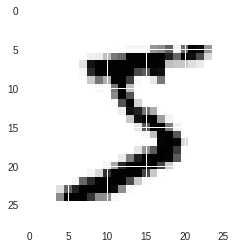

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Dense(20))
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 22s 368us/step - loss: 0.1632 - acc: 0.9513
Epoch 2/10
51712/60000 [========================>.....] - ETA: 2s - loss: 0.0534 - acc: 0.9833

60000/60000 [==============================] - 20s 336us/step - loss: 0.0525 - acc: 0.9836
Epoch 3/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.0390 - acc: 0.9877
Epoch 4/10
14240/60000 [======>.......................] - ETA: 15s - loss: 0.0248 - acc: 0.9922

60000/60000 [==============================] - 20s 334us/step - loss: 0.0300 - acc: 0.9905
Epoch 5/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0253 - acc: 0.9923
Epoch 6/10
 3136/60000 [>.............................] - ETA: 18s - loss: 0.0142 - acc: 0.9946

60000/60000 [==============================] - 20s 335us/step - loss: 0.0216 - acc: 0.9933
Epoch 7/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0178 - acc: 0.9940


Epoch 8/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.0156 - acc: 0.9948
Epoch 9/10
52256/60000 [=========================>....] - ETA: 2s - loss: 0.0141 - acc: 0.9957

60000/60000 [==============================] - 20s 334us/step - loss: 0.0141 - acc: 0.9956
Epoch 10/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.0129 - acc: 0.9959


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.0281478780708685, 0.9922]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.3200649e-12 1.1816283e-14 1.1723056e-10 5.5459935e-11 1.2645981e-19
  3.2028071e-16 1.9654664e-19 1.0000000e+00 1.4739918e-14 2.3531144e-11]
 [1.0779021e-10 2.0353723e-10 1.0000000e+00 3.9917685e-17 3.1685017e-16
  2.9641139e-23 1.9348321e-12 1.4990189e-17 1.1529245e-11 2.2250457e-16]
 [6.1237508e-09 9.9998832e-01 4.6301814e-08 4.5911314e-10 2.2032798e-06
  2.1137025e-08 3.4203783e-08 9.3196659e-06 3.2482959e-08 4.5596842e-08]
 [9.9999988e-01 8.9400317e-17 1.3803743e-12 5.5210651e-14 1.3032705e-12
  8.1254465e-12 7.5957111e-08 2.7570611e-12 5.0191512e-10 6.2386352e-10]
 [1.8908156e-12 1.6070706e-11 2.9860179e-15 5.1005131e-15 1.0000000e+00
  4.2169004e-11 8.6523072e-10 5.1669254e-13 1.0377627e-08 2.3475458e-08]
 [1.4575893e-09 9.9998617e-01 3.8958209e-08 1.1915585e-11 1.1442830e-06
  1.0788313e-10 1.2261703e-10 1.2632590e-05 1.1491648e-08 3.2448650e-08]
 [3.3310987e-19 5.9215961e-12 6.0871176e-16 6.9533636e-20 1.0000000e+00
  3.5236326e-12 1.5063060e-15 1.2088093e-12 9.1615387e-10 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7f828d6fdcc0>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7f828d7dbb70>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7f828d7dbdd8>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7f828d7db320>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7f828d77cef0>,
 'dense_1': <keras.layers.core.Dense at 0x7f828d750828>,
 'dense_2': <keras.layers.core.Dense at 0x7f828d750b70>,
 'flatten_1': <keras.layers.core.Flatten at 0x7f828d77cf60>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7f828d7cc438>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x7f828d7a8e80>}

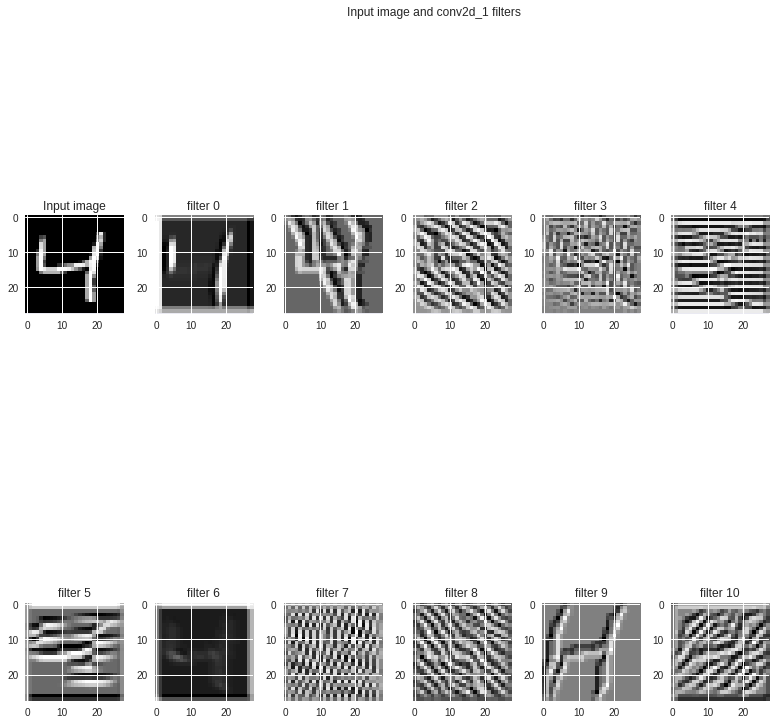

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()